In [1]:
%matplotlib inline
import geopandas as gpd
 
from weavingspace import WeaveUnit
from weavingspace import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Biaxial weave

<Axes: >

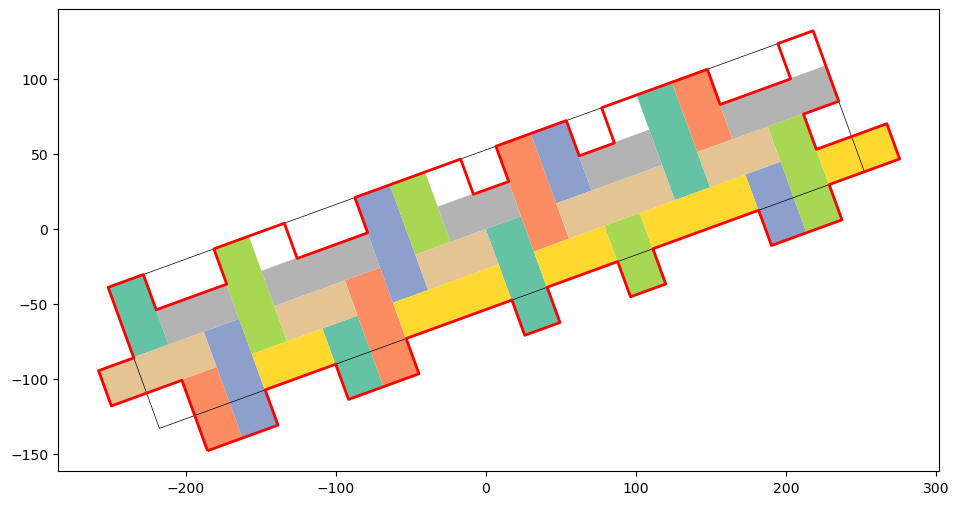

In [3]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 25, aspect = 1,
               strands = "abcd-|efg-", crs = ak.crs).transform_rotate(20)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6), show_ids = False)

In [5]:
weave1 = Tiling(w1, ak)

/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/constructive.py:995: RuntimeWarning: divide by zero encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)
/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/constructive.py:995: RuntimeWarning: invalid value encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)


In [5]:
# import copy

# tiles = copy.deepcopy(weave1.tiles)
# areas = copy.deepcopy(ak)

In [6]:
# tiles.geometry = tiles.centroid
# tiles["tileUID"] = range(tiles.shape[0])

In [7]:
# tiles.sjoin(areas, how = "inner")[["tileUID", "DZ2018"]]

In [6]:
textile1 = weave1.get_tiled_map(# prioritise_tiles = False, 
                                # ragged_edges = False, 
                                debug = True, rotation = 0)

STEP 1: prep data (rotation if requested): 0.001
STEP A2: overlay zones with tiling: 6.720
STEP A3: calculate areas: 0.007
STEP A4: drop columns prior to join: 0.008
STEP A5: build lookup for join: 2.971
STEP A6: perform lookup join: 0.087


In [7]:
textile1.variables = [x for x in ak.columns if "Rank" in x]
textile1.colourmaps = dict(zip(textile1.variables,
                               ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG", "PRGn", "PuOr")))

Only a list of variables specified, assigning to 
                  available element_ids.


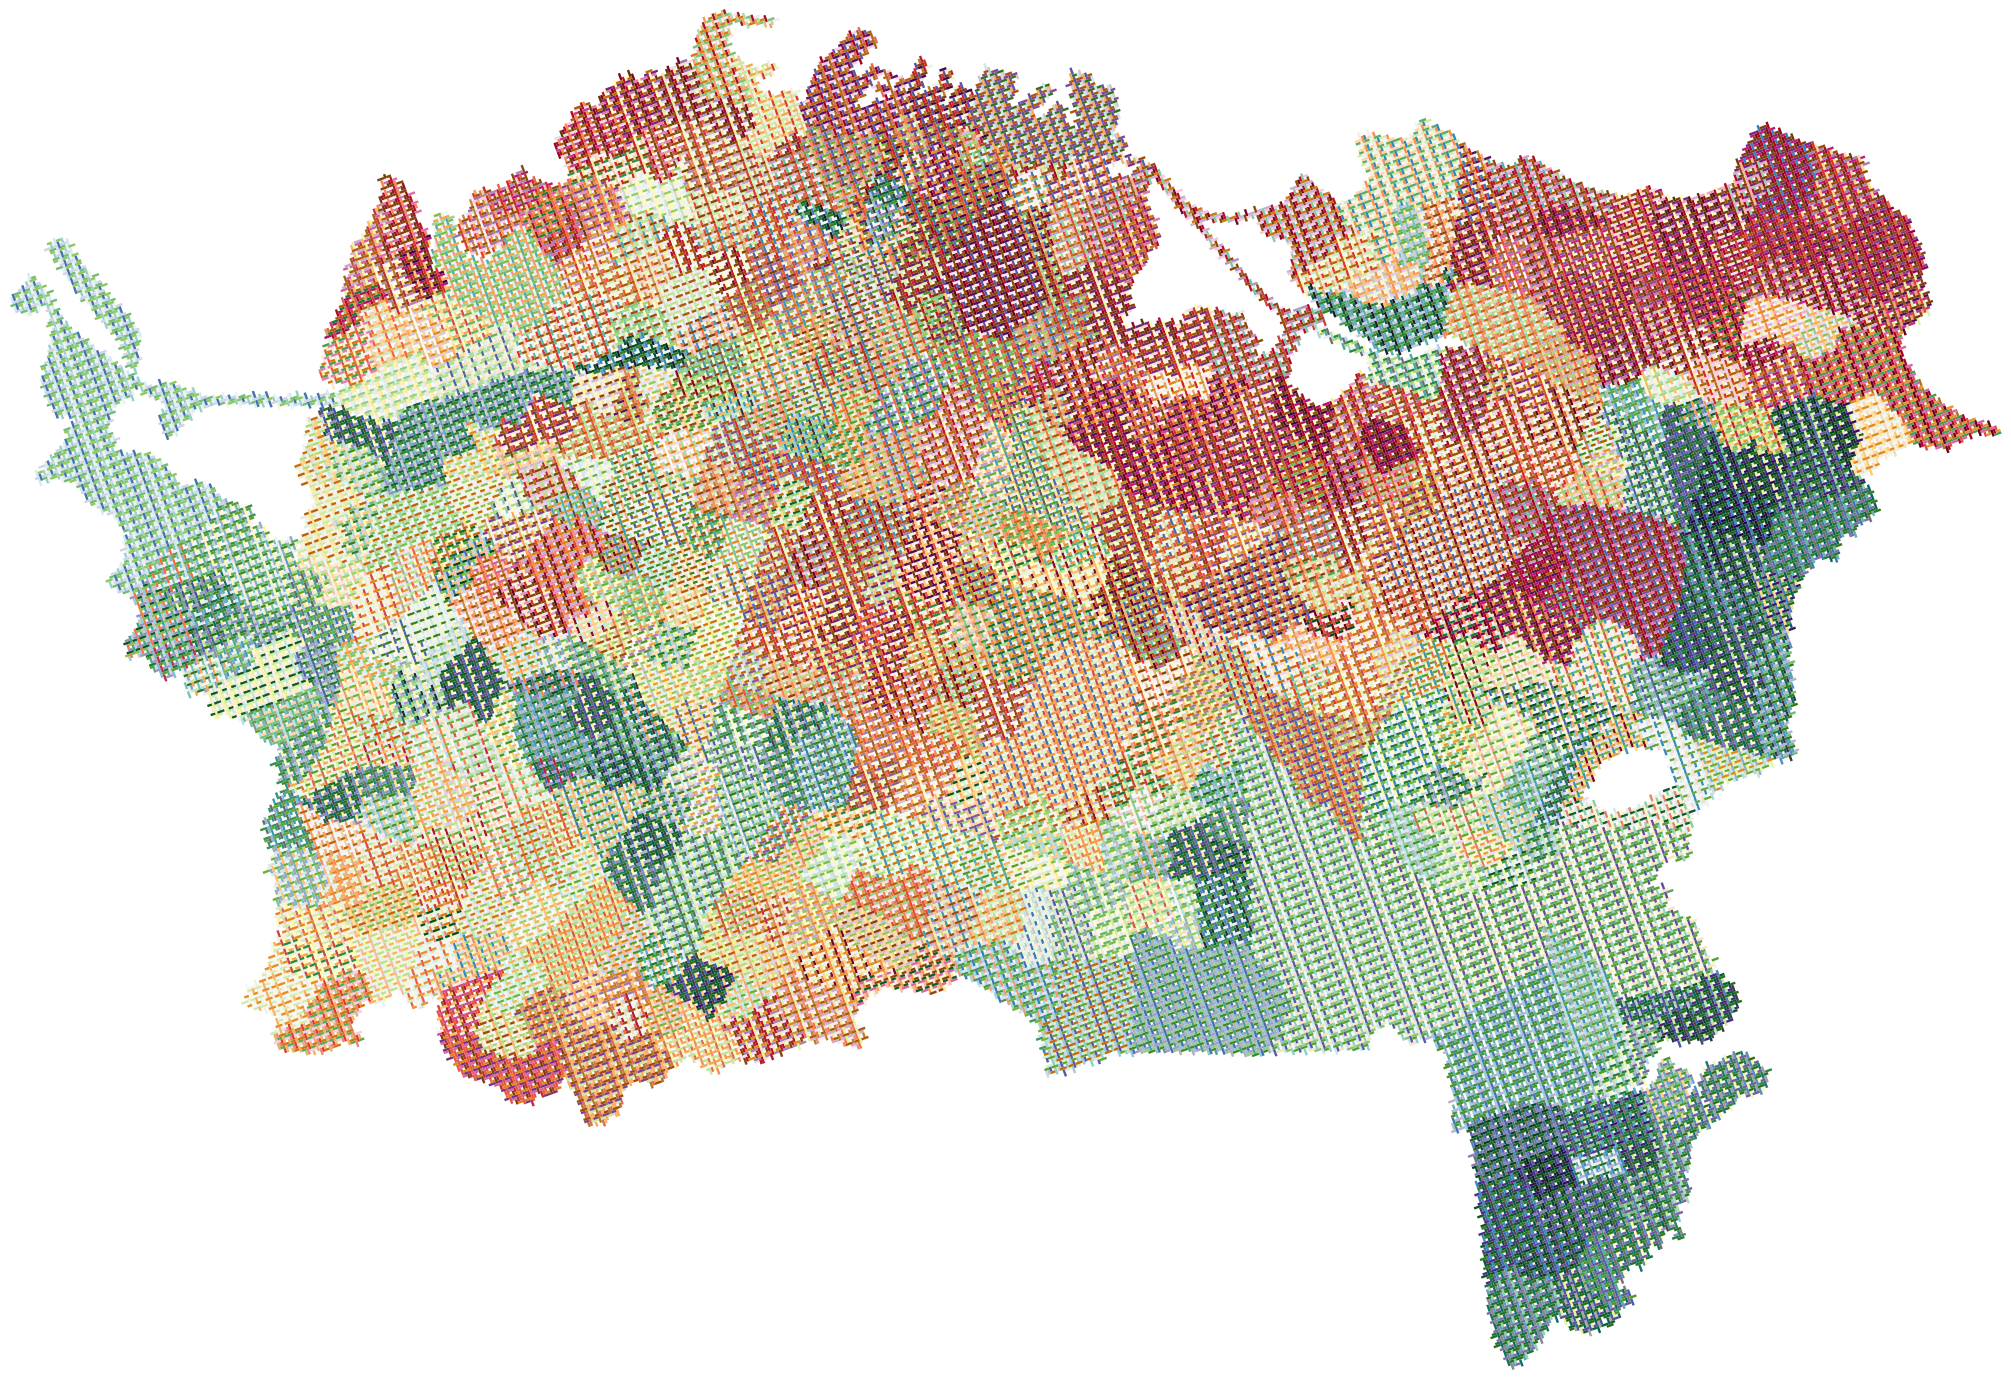

In [8]:
fig = textile1.render(legend = False)

### Exploring alternative steps prioritise tiling elements

In [9]:
import time

tiles = weave1.tiles
tiles.sindex
tiles["tileUID"] = range(tiles.shape[0])

ak.sindex

In [10]:
overlaps = tiles.sjoin(ak)

In [11]:
dups = overlaps.duplicated(subset = ["tileUID"])
mult_overlaps = overlaps.loc[list(dups), ["element_id", "tileUID", "geometry"]]
mult_overlaps.sindex

In [12]:
overlap_areas = mult_overlaps.overlay(ak)
overlap_areas["area"] = overlap_areas.geometry.area

In [13]:
overlap_areas[["tileUID", "DZ2018", "area", "geometry"]]

tileUID   DZ2018         area  \
0        37147  7601312   513.866712   
1        37163  7601312  1166.504198   
2        37168  7601312   561.963122   
3        38356  7601312  1248.098494   
4        38360  7601312  1272.955982   
...        ...      ...          ...   
46445   254275  7600624   825.289084   
46446   254278  7600624   637.199280   
46447   254282  7600624    42.602785   
46448   254297  7600624    25.426470   
46449   255552  7600624   268.683626   

                                                geometry  
0      POLYGON ((1764065.737 5908540.828, 1764067.132...  
1      POLYGON ((1764022.239 5908524.996, 1764013.689...  
2      POLYGON ((1764037.181 5908557.039, 1764028.630...  
3      POLYGON ((1764035.022 5908636.066, 1764050.960...  
4      POLYGON ((1764049.963 5908668.109, 1764064.675...  
...                                                  ...  
46445  POLYGON ((1754246.850 5920982.920, 1754223.357...  
46446  POLYGON ((1754235.020 5921015.424, 1754279.846...  
46447  POLYGON ((1754191.315 5920989.312, 1754166.897...  
46448  POLYGON ((1754279.846 5921038.454, 1754281.652...  
46449  POLYGON ((1754016.159 5921031.978, 1754007.812...  

[46450 rows x 4 columns]